# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

1. school - Название школы (Бинарный признак: "GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
2. sex - Пол (Бинарный признак: "F" - женский или "M" - мужской)
3. age - Возраст (Порядковый признак: от 15 до 22)
4. address - Тип местности, в которой проживает студент (Бинарный признак: "U" - Городская или "R" - Сельская местность)
5. famsize - Число людей в семье (Бинарный признак: "LE3" - меньше или равно 3 или "GT3" - больше 3) 
6. Pstatus - Статус сожительства родителей (Бинарный признак: "T" - проживают вместе или "A" - раздельно)
7. Medu - Образование матери (Порядковый признак: 0 - Нет образования,  1 - начальное образование (4 класса), 2 – с 5го по 9й класс, 3 – среднее образование или 4 – высшее образование)
8. Fedu - Образование отца (Порядковый признак: 0 - Нет образования,  1 - начальное образование (4 класса), 2 – с 5го по 9й класс, 3 – среднее образование или 4 – высшее образование)
9. Mjob - Работа матери (Номинальный признак: "teacher", "health" связанные с медицинскими, образовательными услугами, госслужащие "services", "at_home" или "other")
10. Fjob -(Номинальный признак: "teacher", "health" связанные с медицинскими, образовательными услугами, госслужащие "services", "at_home" или "other")
11. reason - Причина выбора данной школы (Номинальный признак: близко к дому "home", репутация школы "reputation", предпочтение курса "course"  или другое "other")
12. guardian - Опекун ученика (Номинальный признак: "mother", "father" or "other")
13. traveltime - Время в пути от дома до школы (Порядковый признак: 1 - < 15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 часа, or 4 - > 1 часа)
14. studytime - Время, затрачиваемое на обучение в неделю (Порядковый признак: 1 - < 2 часов, 2 - от 2 to 5 часов, от 3 - 5 до 10 hours, или 4 - >10 часов)
15. failures - Количество несданных предметов (Порядковый признак: n если 1 <= n < 3, иначе 4)
16. schoolsup - Дополнительная поддержка в образовании (Бинарный признак: yes или no)
17. famsup - Помощь семьи в образовании (Бинарный признак: yes или no)
18. paid - Дополнительные платные занятия а рамках предметов курса (Математика или португальский) (Бинарный признак: yes или no)
19. activities - факультативные занятия  (Бинарный признак: yes или no)
20. nursery - Ходил(а) ли в детский сад (Бинарный признак: yes или no)
21. higher - Желание получить высшее образование (Бинарный признак: yes или no)
22. internet - Доступ к Интернету дома (Бинарный признак: yes или no)
23. romantic - Наличие романтических отношений (Бинарный признак: yes или no)
24. famrel - Качество семейных отношений (Порядковый признак: from 1 - очень плохие to 5 - отличные)
25. freetime - Количество свободного времени после школы (Порядковый признак: от 1 - очень мало до 5 - очень много)
26. goout - Оценка количества времени проводимого с друзьями (Порядковый признак: от 1 - очень мало до 5 - очень много)
27. Dalc - Оценка количества потребляемого алкоголя по будням (Порядковый признак: от 1 - очень мало до 5 - очень много)
28. Walc - Оценка количества потребляемого алкоголя по выходным (Порядковый признак: от 1 - очень мало до 5 - очень много)
29. health - текущее состояние здоровья (Порядковый признак: от 1 - очень плохое до 5 - очень хорошее)
30. absences - Число пропусков школьных занятий (Порядковый признак: от 0 до 93)
Нижепредставленные оценки относятся к основному предмету курса (Математика или Португальский)
31. G1 - Оценка в первом учебном году (Порядковый признак: от 0 до 20)
31. G2 - Оценка во втором учебном году (Порядковый признак: от 0 до 20)
32. G3 - Итоговая оценка (Порядковый признак: от 0 да 20, целевая переменная)

### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)
- Предобработка данных (1.7)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)
    - Подсчитайте количество людей, у которых матери с образованием "0" (0.4)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (0.4)
    - Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import RidgeCV, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv("student-por.csv",sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями 

In [4]:
True in pd.isnull(df)

False

### В данных нет пропусков

## Подсчитайте количество людей, у которых матери с образованием "0" 

In [5]:
sum(df['Medu']==0)

6

### Есть 6 людей, у которых матери с образованием "0"

## Преобразуйте все номинальные признаки в несколько признаков с бинарным значением

In [6]:
df = pd.get_dummies(df, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])

In [7]:
df.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other'], dtype=object)

### Так же преобразуем бинарные признаки закодированные словами в бинарные закодированные числами
### (SelectKBest не будет работать со строковыми значениями)

In [8]:
def binarize(df, cols):
    for name in cols:
        lb = LabelBinarizer()
        df[name] = lb.fit_transform(df[name])

In [9]:
binarize(df,['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
      'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


## Используя объект SelectKBest с параметром f_regression выберите два признака, которые наиболее сильно связаны с признаком G3

In [428]:
kb = SelectKBest(score_func=f_regression,k=2)

In [429]:
best_feat = kb.fit_transform(df.drop("G3",axis=1),df["G3"])

In [430]:
kb.get_support(indices=True)

array([26, 27], dtype=int64)

In [431]:
df.drop("G3",axis=1).columns.values[26:28]

array(['G1', 'G2'], dtype=object)

## Ожидаемо, два признака, которые наиболее сильно связаны с признаком G3 (финальной оценкой по предмету) - это оценки за первый и второй годы обучения (G1 и G2)

### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните следующее:

In [385]:
kb = SelectKBest(score_func=f_regression,k=1)
best_feat = kb.fit_transform(df.drop("G3",axis=1),df["G3"])
kb.get_support(indices=True)

array([27], dtype=int64)

In [386]:
df.drop("G3",axis=1).columns.values[27]

'G2'

## SelectKBest показывает, что G2 больше всего влияет на G3

- На обучающей выборке обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty (0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте зависимость R2 oт n_estimators на графике (0.2)
- Max (0.5)
- -----------------------------------
- Используя все доступные регрессоры в библиотеке sklearn, найдите самый лучший регрессор. (2.5)

# RidgeCV

In [11]:
X = np.array(df['G2']).reshape(-1,1)
y = np.array(df['G3'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=23)

In [13]:
rcv = RidgeCV(alphas=np.logspace(-3,2,20,))

In [14]:
rcv.fit(X_train,y_train)

RidgeCV(alphas=array([  1.00000e-03,   1.83298e-03,   3.35982e-03,   6.15848e-03,
         1.12884e-02,   2.06914e-02,   3.79269e-02,   6.95193e-02,
         1.27427e-01,   2.33572e-01,   4.28133e-01,   7.84760e-01,
         1.43845e+00,   2.63665e+00,   4.83293e+00,   8.85867e+00,
         1.62378e+01,   2.97635e+01,   5.45559e+01,   1.00000e+02]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [15]:
rcv.alpha_

2.6366508987303581

### Лучшее alpha = 2.6366508987303581

In [16]:
y_pred = rcv.predict(X_test)

In [18]:
mean_absolute_error(y_pred,y_test)

0.80259980163839095

In [19]:
mean_squared_error(y_pred,y_test)

1.6034049275976037

In [20]:
median_absolute_error(y_pred,y_test)

0.61723756944198627

In [21]:
r2_score(y_pred,y_test)

0.79912698336150689

# SGDRegressor

In [23]:
sgdr_l1 = SGDRegressor(penalty='l1',)
sgdr_l2 = SGDRegressor(penalty='l2')
sgdr_eln = SGDRegressor(penalty='elasticnet')

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [24]:
sgdr_l1.fit(X_train,y_train);
sgdr_l2.fit(X_train,y_train);
sgdr_eln.fit(X_train,y_train);

In [25]:
y_pred_l1 = sgdr_l1.predict(X_test)
y_pred_l2 = sgdr_l2.predict(X_test)
y_pred_eln = sgdr_eln.predict(X_test)

In [27]:
r2_score(y_pred_l1,y_test)

0.79657927351773916

In [28]:
r2_score(y_pred_l2,y_test)

0.79755667610361547

In [29]:
r2_score(y_pred_eln,y_test)

0.79533609377853498

In [30]:
mean_squared_error(y_pred_l1,y_test)

1.6063735310156895

In [31]:
mean_squared_error(y_pred_l2,y_test)

1.6853876268063523

In [32]:
mean_squared_error(y_pred_eln,y_test)

1.6065151252651562

# GradientBoostingRegressor

In [33]:
md = [1,3,10]
ne = np.arange(100,1100,100)
results = pd.DataFrame()

In [34]:
for max_d in md:
    for n_est in ne:
        gbr = GradientBoostingRegressor(max_depth=max_d,n_estimators=n_est,random_state=1)
        gbr.fit(X_train,y_train)
        y_pred = gbr.predict(X_test)
        r2score = r2_score(y_pred,y_test)
        msescore = mean_squared_error(y_pred,y_test)
        results = results.append({'Parameters':{'max_depth':max_d,'n_estimators':n_est},'R2 score':r2score,'MSE':msescore},ignore_index=True)

In [39]:
results[['Parameters','R2 score','MSE']]

,Parameters,R2 score,MSE
0,"{'max_depth': 1, 'n_estimators': 100}",0.798372,1.557207
1,"{'max_depth': 1, 'n_estimators': 200}",0.805487,1.563917
2,"{'max_depth': 1, 'n_estimators': 300}",0.805693,1.564267
3,"{'max_depth': 1, 'n_estimators': 400}",0.805699,1.564277
4,"{'max_depth': 1, 'n_estimators': 500}",0.805699,1.564277
5,"{'max_depth': 1, 'n_estimators': 600}",0.805699,1.564277
6,"{'max_depth': 1, 'n_estimators': 700}",0.805699,1.564277
7,"{'max_depth': 1, 'n_estimators': 800}",0.805699,1.564277
8,"{'max_depth': 1, 'n_estimators': 900}",0.805699,1.564277
9,"{'max_depth': 1, 'n_estimators': 1000}",0.805699,1.564277


In [41]:
results['Parameters'][results['R2 score'].idxmax()]

{'max_depth': 1, 'n_estimators': 1000}

In [46]:
print(results['Parameters'][results['MSE'].idxmin()],'mse = ',results['MSE'].min())

{'max_depth': 1, 'n_estimators': 100} mse =  1.55720701121


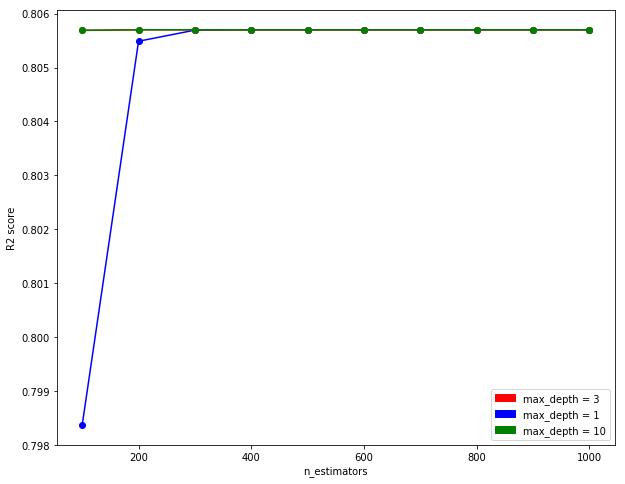

In [44]:

plt.xlabel('n_estimators')
plt.ylabel('R2 score')
plt.plot(ne,list(results['R2 score'] [:10]),marker = 'o',c="b")
plt.plot(ne,list(results['R2 score'] [10:20]),marker = 'o',c="r")
plt.plot(ne,list(results['R2 score'] [20:]),marker = 'o',c="g")
red_patch = mpatches.Patch(color='red', label='max_depth = 3')
blue_patch = mpatches.Patch(color='blue', label='max_depth = 1')
green_patch = mpatches.Patch(color='green', label='max_depth = 10')
plt.legend(handles=[red_patch,blue_patch,green_patch])
mpl.rcParams['figure.figsize'] = (10.0,8.0)
plt.show()

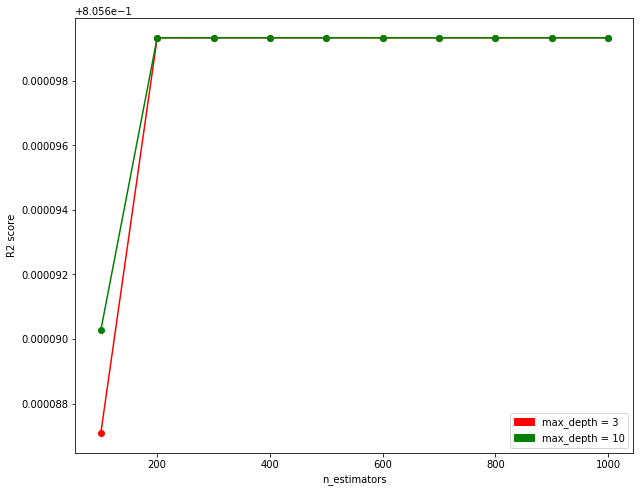

In [45]:
plt.xlabel('n_estimators')
plt.ylabel('R2 score')
plt.plot(ne,list(results['R2 score'] [10:20]),marker = 'o',c="r")
plt.plot(ne,list(results['R2 score'] [20:]),marker = 'o',c="g")
red_patch = mpatches.Patch(color='red', label='max_depth = 3')
blue_patch = mpatches.Patch(color='blue', label='max_depth = 1')
green_patch = mpatches.Patch(color='green', label='max_depth = 10')
plt.legend(handles=[red_patch,green_patch])
mpl.rcParams['figure.figsize'] = (10.0,8.0)
plt.show()

## Результат SGDRegressor: MSE = 1.6014573607966061

In [347]:
md = [1,3,10,20]
ne = np.arange(100,1100,100)
results3 = pd.DataFrame()

In [354]:
for max_d in md:
    for n_est in ne:
        gbr = GradientBoostingRegressor(max_depth=max_d,n_estimators=n_est)
        gbr.fit(X_train,y_train)
        y_pred = gbr.predict(X_test)
        score = mean_squared_error(y_pred,y_test)
        results3 = results3.append({'Parameters':{'max_depth':max_d,'n_estimators':n_est},'MSE':score},ignore_index=True)

In [355]:
results3

,MSE,Parameters
0,1.557207,"{'max_depth': 1, 'n_estimators': 100}"
1,1.563917,"{'max_depth': 1, 'n_estimators': 200}"
2,1.564267,"{'max_depth': 1, 'n_estimators': 300}"
3,1.564277,"{'max_depth': 1, 'n_estimators': 400}"
4,1.564277,"{'max_depth': 1, 'n_estimators': 500}"
5,1.564277,"{'max_depth': 1, 'n_estimators': 600}"
6,1.564277,"{'max_depth': 1, 'n_estimators': 700}"
7,1.564277,"{'max_depth': 1, 'n_estimators': 800}"
8,1.564277,"{'max_depth': 1, 'n_estimators': 900}"
9,1.564277,"{'max_depth': 1, 'n_estimators': 1000}"


In [356]:
results3['MSE'][results3['MSE'].idxmin()]

1.5566395106286695

In [357]:
results3['MSE'].idxmin()

49

In [358]:
results3.iloc[49]

MSE                                          1.55664
Parameters    {'max_depth': 1, 'n_estimators': 1000}
Name: 49, dtype: object

## Результат SGDRegressor: MSE = 1.6014573607966061

# Лучший результат по метрике MSE показала модель GradientBoostingRegressor с параметрами {'max_depth': 1, 'n_estimators': 1000}, значение MSE = 1.55664

### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности факторов, влияющих на потребление алкоголя. Повторите эксперимент с использование объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Найдите наилучший классификатор. Укажите accuracy для наилучших параметров (2.5)

In [47]:
df_new = df

In [48]:
df_new['Alc'] = (df_new['Walc']*2+df_new['Dalc']*5)/7

In [49]:
df_new['Alc'] = [int((x>3)) for x in df_new['Alc']]

In [50]:
df_new.drop(['Walc','Dalc'],axis=1,inplace=True)

In [51]:
(df.loc[ [x for x in map(bool,list(df['Alc']))] ]);#студенты с Alc = 1

In [52]:
df_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,Alc
0,0,0,18,1,0,0,4,4,2,2,...,0,1,1,0,0,0,0,1,0,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,1,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,0,0,1,0,0,0,1,0,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,0,1,0,0,1,0,0,0


In [53]:
#backwards elimination
X = df_new.drop('Alc',axis=1)
y = df_new['Alc']
columns = X.columns.values
condition = True
while condition:
    rfc_outer = RandomForestClassifier(n_jobs=-1,random_state=99)
    cur_score = cross_validate(rfc_outer,X[columns],y,n_jobs=-1,cv=3)['test_score'].mean()
    reduced_feat_scores = np.empty(0)
    for i in range(0,columns.shape[0]):
        reduced_feat_scores = np.append(reduced_feat_scores,cross_validate(rfc_outer,X[np.delete(columns,i)],y,n_jobs=-1,cv=3)['test_score'].mean())
        
    dscores = reduced_feat_scores - cur_score
    if(np.any(dscores>0)):
        columns = np.delete(columns,dscores.argmax())
        print("removing ",columns[dscores.argmax()])
    condition = np.any(dscores>0) and columns.shape[0]>6
    

removing  Mjob_teacher


### Random Forest

In [59]:
rfc_params = {'criterion' : ('gini','entropy'),'n_estimators':np.arange(10,500,20),'max_depth':(1,5,8,10,15,17,20)}

In [60]:
rfc_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=1,n_jobs=-1),param_grid=rfc_params,scoring='accuracy',n_jobs=-1,cv=3)

In [61]:
rfc_cv.fit(X[columns],y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ('gini', 'entropy'), 'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490]), 'max_depth': (1, 5, 8, 10, 15, 17, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### Лучшие параметры Random Forest

In [62]:
rfc_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### Лучшее качество Random Forest

In [63]:
rfc_cv.best_score_

0.89984591679506931

### GradientBoostingClassifier

In [64]:
gbr_params = {'loss':('deviance', 'exponential'),'learning_rate':np.logspace(-3,3,10),'n_estimators':np.arange(10,500,20),'max_depth':(1,5,8,10,15,17,20)}

In [67]:
gbr_cv = GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),param_grid=gbr_params,cv=3,scoring='accuracy',n_jobs=-1)

In [68]:
gbr_cv.fit(X[columns],y)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'loss': ('deviance', 'exponential'), 'learning_rate': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03]), 'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490]), 'max_depth': (1, 5, 8, 10,

### Лучшие параметры GradientBoostingClassifier

In [69]:
gbr_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0046415888336127772, loss='deviance',
              max_depth=1, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=470,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

### Лучшее качество GradientBoostingClassifier

In [70]:
gbr_cv.best_score_

0.90138674884437597

### AdaBoostClassifier

In [82]:
abc_params = {'learning_rate':np.logspace(-3,3,10),'n_estimators':np.arange(10,600,20),'algorithm' : ('SAMME', 'SAMME.R')}

In [83]:
abc_cv = GridSearchCV(estimator=AdaBoostClassifier(random_state=2),param_grid=abc_params,cv=3,scoring='accuracy',n_jobs=-1)

In [84]:
abc_cv.fit(X[columns],y)

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=2),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03]), 'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510,
       530, 550, 570, 590]), 'algorithm': ('SAMME', 'SAMME.R')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### Лучшие параметры AdaBoostClassifier

In [85]:
abc_cv.best_estimator_

AdaBoostClassifier(algorithm='SAMME', base_estimator=None,
          learning_rate=0.021544346900318832, n_estimators=450,
          random_state=2)

### Лучшее качество AdaBoostClassifier

In [86]:
abc_cv.best_score_

0.90138674884437597

### AdaBoostClassifier и GradientBoostingClassifier имеют одинакове лучшее качество, это обусловленно тем что они постоили почти одинаковые модели. Случайный лес имеет почти такое же качество.